# (N)on-(E)uclidean (U)pgrading
---
#### Description of NEU:
The NEU meta-algorithm learns a geometry for the input and (input $\times$ output) spaces by deforming them with a universal class of homeomorphisms + robustifies the involved loss functions to improve generalizability of the new and very flexible model.  
$$
\begin{aligned}
f \mapsto& \, \rho \circ f \circ \phi\\
\mathbb{E}_{\mathbb{P}}[\ell(f(X))] \mapsto & \,\max_{\mathbb{Q}\sim \mathbb{P}}\, \mathbb{E}_{\mathbb{Q}}[\ell(\rho(\phi(X), f\circ \phi(X)))].
\end{aligned}
$$
$\rho=\pi\circ \tilde{\rho}$, and $\tilde{\rho}$ and $\phi$ are "universal homeomorphisms" on $\operatorname{dom}(f)$ and on $\operatorname{dom}(f)\times \operatorname{co-dom}(f)$, respectively.  

---

---

#### Description of regression problem: 
In this notebook we implement the regression problem
$$
\begin{aligned}
y_i =&  \,f(x_i)\delta_i + \epsilon_i, \qquad i=1,\dots,N\\
\epsilon_i \sim &\, \mathcal{N}(0,\sigma),\\
\delta_i\sim &  \,U(1-D,1+D),
\end{aligned}
$$
for some *variance* $\sigma>0$ and *degree of model misspecification level* $0<D<1$.  
The quantity $\epsilon$ can be understood as, classical, additive noise while the quantity $\delta$ represents multiplicative noise.

---

---

### Functions from the paper:
 - 1) $\min\{\exp(\frac{-1}{(1+x)^2}),x+\cos(x)\}$. Reason: Evaluate performance for pasted functions and general badness.
 - 2) $\cos(\exp(-x))$.  Reason: Evaluate performance for non-periodic osculations.
 - 3) $I_{(-\infty,\frac1{2})}$.  Reason: Evaluation performance on a single jump.  
 
 ---

## Initializations:
- Load Dependancies,
- Makes Paths if missing.

In [1]:
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# Load Hyper( and meta) parameter(s)
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())

Using TensorFlow backend.


Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!


/scratch/users/kratsioa/.local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Initialize Internal Variables/(Hyper)parameter(s)

## Check/Make Paths

In [2]:
Path('./outputs/models/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Invertible_Networks/GLd_Net/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Invertible_Networks/Ed_Net/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Linear_Regression/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/Greedy_Initializations/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/Greedy_Initializations/Base_Regressor/').mkdir(parents=True, exist_ok=True)
Path('./outputs/tables/').mkdir(parents=True, exist_ok=True)
Path('./outputs/results/').mkdir(parents=True, exist_ok=True)
Path('./inputs/data/').mkdir(parents=True, exist_ok=True)

# Generate Training Data

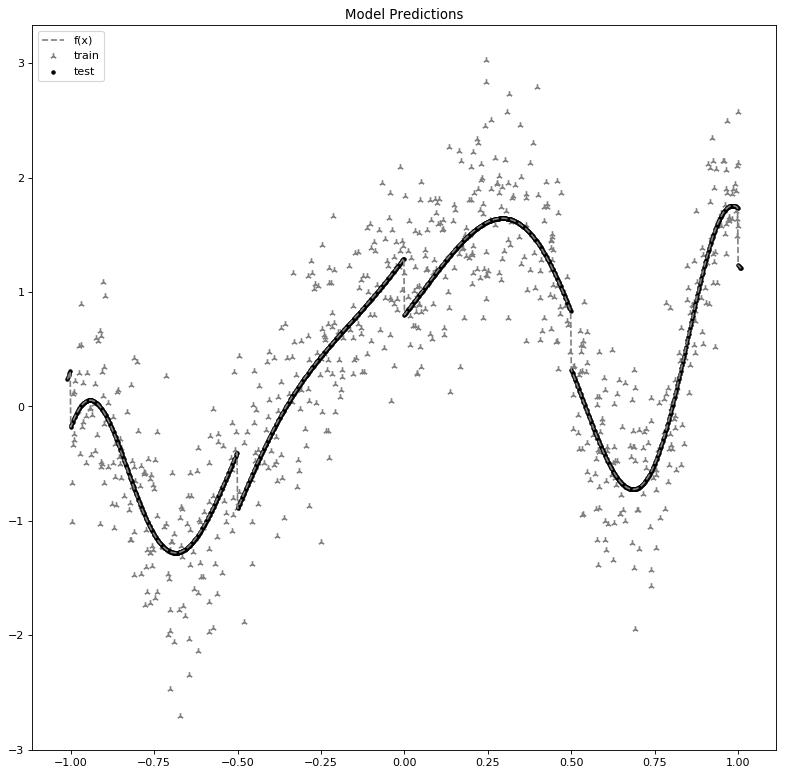

In [3]:
#------------------------#
# Run External Notebooks #
#------------------------#
# Generate Data
%run Data_Generator.ipynb

#### Prepare data for NEU

## 1) Get Basic Regression Models
 1. Get Base regression model (benchmark),
 2. Get Base regression model for NEU.

## Get basic regression model - Benchmark

In [4]:
if False:#os.path.exists('./outputs/models/Benchmarks/Linear_Regression/saved_model.pb'):
    #------------------#
    # Load Readout Map #
    #------------------#
    print('Benchmark model - already exists: Loading...')
    regression_Benchmark = tf.keras.models.load_model("./outputs/models/Benchmarks/Linear_Regression/")
    print('Benchmark model - already exists: Loaded.')
else:
    print('Pre-trained benchmark model does not exist: Training.')
    tf.random.set_seed(2020)
    ffNN_y_hat_train,ffNN_y_hat_test = build_ffNN(n_folds =CV_folds, 
                                                 n_jobs = n_jobs, 
                                                 n_iter = n_iter, 
                                                 param_grid_in = param_grid_Vanilla_Nets, 
                                                 X_train = data_x, 
                                                 y_train = data_y,
                                                 X_test = data_x_test)

Pre-trained benchmark model does not exist: Training.
Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done  13 out of  16 | elapsed:  6.5min remaining:  1.5min
[Parallel(n_jobs=3)]: Done  16 out of  16 | elapsed:  8.9min finished


Epoch 1/100
47/47 [==============================] - 0s 3ms/step - loss: 0.8789 - mse: 1.1252 - mae: 0.8789 - mape: 152.4347
Epoch 2/100
47/47 [==============================] - 0s 3ms/step - loss: 0.7970 - mse: 0.9518 - mae: 0.7970 - mape: 190.7722
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 0.7772 - mse: 0.8990 - mae: 0.7772 - mape: 211.0753
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 0.7627 - mse: 0.8747 - mae: 0.7627 - mape: 205.7007
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 0.7319 - mse: 0.8183 - mae: 0.7319 - mape: 201.1637
Epoch 6/100
47/47 [==============================] - 0s 3ms/step - loss: 0.6562 - mse: 0.7020 - mae: 0.6562 - mape: 179.1772
Epoch 7/100
47/47 [==============================] - 0s 3ms/step - loss: 0.6166 - mse: 0.6122 - mae: 0.6166 - mape: 152.2395
Epoch 8/100
47/47 [==============================] - 0s 3ms/step - loss: 0.6111 - mse: 0.5897 - mae: 0.6111 - mape: 164.9868


47/47 [==============================] - 0s 3ms/step - loss: 0.4273 - mse: 0.2878 - mae: 0.4273 - mape: 130.5102
Epoch 67/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4199 - mse: 0.2778 - mae: 0.4199 - mape: 113.5225
Epoch 68/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4153 - mse: 0.2726 - mae: 0.4153 - mape: 109.6021
Epoch 69/100
47/47 [==============================] - 0s 5ms/step - loss: 0.4162 - mse: 0.2673 - mae: 0.4162 - mape: 119.5638
Epoch 70/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4155 - mse: 0.2722 - mae: 0.4155 - mape: 110.3735
Epoch 71/100
47/47 [==============================] - 0s 4ms/step - loss: 0.4109 - mse: 0.2686 - mae: 0.4109 - mape: 112.3028
Epoch 72/100
47/47 [==============================] - 0s 3ms/step - loss: 0.4209 - mse: 0.2832 - mae: 0.4209 - mape: 109.7974
Epoch 73/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4132 - mse: 0.2638 - mae: 0.4132 - mape: 115.6488
Epoch

# Train NEU-ffNN

In [5]:
tf.random.set_seed(2020)
print('Pre-trained benchmark model does not exist: Training.')
NEU_ffNN_y_hat_train, NEU_ffNN_y_hat_test = build_NEU_ffNN(n_folds =CV_folds, 
                                                          n_jobs = n_jobs, 
                                                          n_iter = n_iter, 
                                                          param_grid_in = param_grid_NEU_Nets, 
                                                          X_train = data_x, 
                                                          y_train = data_y,
                                                          X_test = data_x_test)

Pre-trained benchmark model does not exist: Training.
Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:   16.9s
/scratch/users/kratsioa/.local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:   57.9s
[Parallel(n_jobs=3)]: Done  13 out of  16 | elapsed:  6.4min remaining:  1.5min
[Parallel(n_jobs=3)]: Done  16 out of  16 | elapsed:  7.1min finished


Epoch 1/50
24/24 [==============================] - 0s 8ms/step - loss: 0.8977 - mse: 1.1278 - mae: 0.8803 - mape: 123.7939
Epoch 2/50
24/24 [==============================] - 0s 12ms/step - loss: 0.8731 - mse: 1.0479 - mae: 0.8579 - mape: 154.2216
Epoch 3/50
24/24 [==============================] - 0s 9ms/step - loss: 0.8636 - mse: 1.0320 - mae: 0.8485 - mape: 153.9518
Epoch 4/50
24/24 [==============================] - 0s 8ms/step - loss: 0.8627 - mse: 1.0335 - mae: 0.8473 - mape: 159.2899
Epoch 5/50
24/24 [==============================] - 0s 14ms/step - loss: 0.8754 - mse: 1.0417 - mae: 0.8608 - mape: 151.8865
Epoch 6/50
24/24 [==============================] - 0s 7ms/step - loss: 0.8568 - mse: 1.0182 - mae: 0.8417 - mape: 159.1565
Epoch 7/50
24/24 [==============================] - 0s 8ms/step - loss: 0.8592 - mse: 1.0096 - mae: 0.8446 - mape: 151.4411
Epoch 8/50
24/24 [==============================] - 0s 8ms/step - loss: 0.8582 - mse: 1.0393 - mae: 0.8428 - mape: 161.7292
Epoch 

### Generate Plots - Visualization

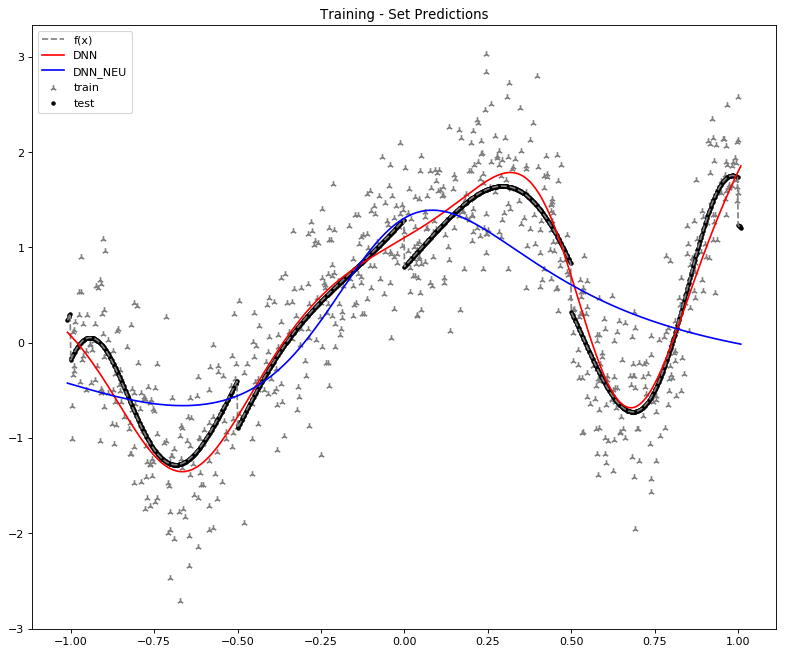

In [6]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x).reshape(-1,),data_y.reshape(-1,),color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test).reshape(-1,),data_y_test.reshape(-1,),color='black',label='test', marker = '.')


# Plot Benchmark(s)
plt.plot(np.array(data_x_test).reshape(-1,),ffNN_y_hat_test, color = 'red', label='DNN')
# Plot NEU Regressors
plt.plot(np.array(data_x_test).reshape(-1,),NEU_ffNN_y_hat_test, color = 'blue',label='DNN_NEU')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Training - Set Predictions")
plt.show()

---
---
---

# Benchmark Models

Run univariate regression benchmarks file:

In [7]:
# Run Univariate Regression File #
#--------------------------------#
%run Univariate_Regression_Benchmark_Models.ipynb

# Visualize Predictions

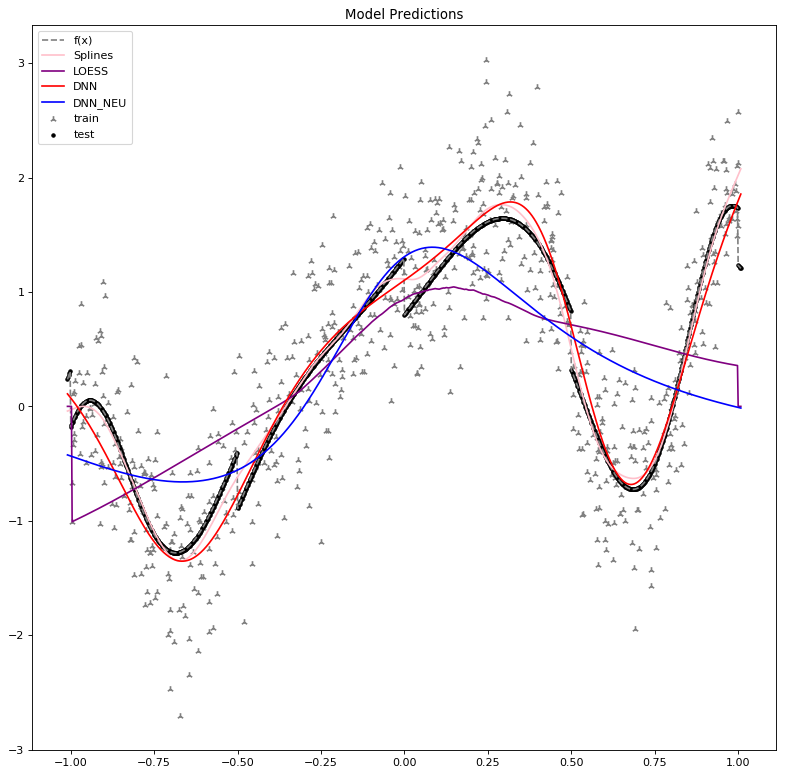

In [8]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

# Plot Benchmark(s)
#------------------#
# Plot Univariate Benchmark(s)
plt.plot(np.array(data_x_test).reshape(-1,),f_hat_smoothing_splines_test,color='pink',label='Splines')
plt.plot(np.array(data_x_test).reshape(-1,),LOESS_prediction_test,color='purple',label='LOESS')

# Plot Benchmark(s)
plt.plot(np.array(data_x_test).reshape(-1,),ffNN_y_hat_test, color = 'red', label='DNN')
# Plot NEU Regressors
plt.plot(np.array(data_x_test).reshape(-1,),NEU_ffNN_y_hat_test, color = 'blue',label='DNN_NEU')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")
plt.show()

 ---

## Performance Report

In [9]:
#--------------------#
# Classical Model(s) #
#--------------------#

# Splines Performance
print("Splines-Performance:")
print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# Loess Performance
print("LOESS Performance:")
print(reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test))

Splines-Performance:
            train        test
MAE      0.389816    0.075655
MSE      0.237285    0.012505
MAPE  2692.019595  234.503159
LOESS Performance:
           train      test
MAE     0.685494  0.541387
MSE     0.721241  0.431801
MAPE  479.905995       inf


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


In [10]:
#--------------#
# DNN Model(s) #
#--------------#
# ffNN Performance
print("ffNN-Performance:")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-ffNN Performance
print("NEU-ffNN Performance:")
print(reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test))

ffNN-Performance:
           train       test
MAE     0.402623   0.131435
MSE     0.257453   0.027250
MAPE  123.011437  47.636888
NEU-ffNN Performance:
            train         test
MAE      0.616669     0.445597
MSE      0.632527     0.341659
MAPE  1246.288911  1301.951858


#### The END

---